<img src='11.jpg'>

In [2]:
#pip install pycaret

In [9]:
import pandas as pd

In [10]:
#Classification

In [14]:
df=pd.read_csv("train .csv")

In [15]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [16]:
from pycaret.classification import*

In [17]:
setup(df,target='outcome')

,Description,Value
0,Session id,4743
1,Target,outcome
2,Target type,Multiclass
3,Target mapping,"died: 0, euthanized: 1, lived: 2"
4,Original data shape,"(1235, 29)"
5,Transformed data shape,"(1235, 80)"
6,Transformed train set shape,"(864, 80)"
7,Transformed test set shape,"(371, 80)"
8,Ordinal features,4
9,Numeric features,12


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6919,0.8408,0.6919,0.6973,0.6896,0.5105,0.5137,0.8270
rf,Random Forest Classifier,0.6839,0.8328,0.6839,0.6921,0.6811,0.4952,0.5000,0.4400
lightgbm,Light Gradient Boosting Machine,0.6769,0.8370,0.6769,0.6831,0.6734,0.4846,0.4894,1.0830
xgboost,Extreme Gradient Boosting,0.6746,0.8274,0.6746,0.6805,0.6711,0.4798,0.4843,0.4440
ada,Ada Boost Classifier,0.6688,0.7770,0.6688,0.6764,0.6656,0.4748,0.4793,0.2790
et,Extra Trees Classifier,0.6677,0.8279,0.6677,0.6733,0.6620,0.4639,0.4679,0.3960
lda,Linear Discriminant Analysis,0.6480,0.8093,0.6480,0.6513,0.6462,0.4400,0.4421,0.2060
ridge,Ridge Classifier,0.6457,0.0000,0.6457,0.6493,0.6427,0.4343,0.4372,0.1980
knn,K Neighbors Classifier,0.5694,0.7054,0.5694,0.5743,0.5676,0.3242,0.3270,0.2060
dt,Decision Tree Classifier,0.5462,0.6457,0.5462,0.5547,0.5474,0.2918,0.2935,0.2030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4743, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
best_model=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7586,0.8749,0.7586,0.7587,0.7550,0.6126,0.6164
1,0.7586,0.9256,0.7586,0.7666,0.7523,0.6062,0.6153
2,0.7011,0.8430,0.7011,0.7033,0.6992,0.5248,0.5266
3,0.7471,0.8779,0.7471,0.7522,0.7447,0.5884,0.5913
4,0.6395,0.8032,0.6395,0.6450,0.6384,0.4423,0.4449
5,0.6628,0.8107,0.6628,0.6654,0.6630,0.4692,0.4702
6,0.6395,0.8060,0.6395,0.6520,0.6425,0.4424,0.4448
7,0.7326,0.8787,0.7326,0.7360,0.7338,0.5802,0.5807
8,0.6512,0.7867,0.6512,0.6508,0.6508,0.4485,0.4486


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

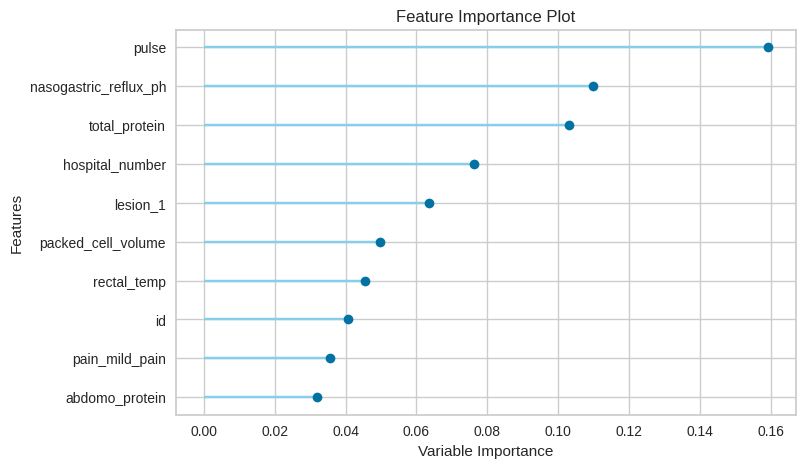

In [21]:
plot_model(best_model,plot='feature')

In [65]:
import tensorflow as tf

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
x=df.drop('outcome', axis=1)
y=df[["outcome"]]

In [68]:
x.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [70]:
x.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [71]:
x=df[['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate','lesion_1', 'lesion_2', 'lesion_3']]

In [72]:
x

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,lesion_1,lesion_2,lesion_3
0,0,yes,adult,530001,38.1,132.0,24.0,2209,0,0
1,1,yes,adult,533836,37.5,88.0,12.0,2208,0,0
2,2,yes,adult,529812,38.3,120.0,28.0,5124,0,0
3,3,yes,adult,5262541,37.1,72.0,30.0,2208,0,0
4,4,no,adult,5299629,38.0,52.0,48.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,2206,0,0
1231,1231,yes,adult,528570,37.5,60.0,50.0,2209,0,0
1232,1232,yes,young,529685,37.5,84.0,40.0,400,0,0
1233,1233,yes,adult,534784,38.1,70.0,16.0,2209,0,0


In [76]:
y

,outcome
0,died
1,euthanized
2,lived
3,lived
4,lived
...,...
1230,lived
1231,died
1232,lived
1233,lived


In [60]:
x=pd.get_dummies(x,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye

In [77]:
y

,outcome
0,died
1,euthanized
2,lived
3,lived
4,lived
...,...
1230,lived
1231,died
1232,lived
1233,lived


In [61]:
x

,id,hospital_number,rectal_temp,pulse,respiratory_rate,lesion_1,lesion_2,lesion_3,surgery_yes,age_young
0,0,530001,38.1,132.0,24.0,2209,0,0,1,0
1,1,533836,37.5,88.0,12.0,2208,0,0,1,0
2,2,529812,38.3,120.0,28.0,5124,0,0,1,0
3,3,5262541,37.1,72.0,30.0,2208,0,0,1,0
4,4,5299629,38.0,52.0,48.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1230,1230,535246,38.5,129.0,48.0,2206,0,0,1,0
1231,1231,528570,37.5,60.0,50.0,2209,0,0,1,0
1232,1232,529685,37.5,84.0,40.0,400,0,0,1,1
1233,1233,534784,38.1,70.0,16.0,2209,0,0,1,0


In [78]:
y["outcome"].value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

In [85]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1235 non-null   int64  
 1   surgery           1235 non-null   object 
 2   age               1235 non-null   object 
 3   hospital_number   1235 non-null   int64  
 4   rectal_temp       1235 non-null   float64
 5   pulse             1235 non-null   float64
 6   respiratory_rate  1235 non-null   float64
 7   lesion_1          1235 non-null   int64  
 8   lesion_2          1235 non-null   int64  
 9   lesion_3          1235 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 96.6+ KB


In [86]:
x

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,lesion_1,lesion_2,lesion_3
0,0,yes,adult,530001,38.1,132.0,24.0,2209,0,0
1,1,yes,adult,533836,37.5,88.0,12.0,2208,0,0
2,2,yes,adult,529812,38.3,120.0,28.0,5124,0,0
3,3,yes,adult,5262541,37.1,72.0,30.0,2208,0,0
4,4,no,adult,5299629,38.0,52.0,48.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,2206,0,0
1231,1231,yes,adult,528570,37.5,60.0,50.0,2209,0,0
1232,1232,yes,young,529685,37.5,84.0,40.0,400,0,0
1233,1233,yes,adult,534784,38.1,70.0,16.0,2209,0,0


In [87]:
x=pd.get_dummies(x,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye

In [79]:
y["outcome"]=y["outcome"].replace(["lived"],1).replace(["euthanized","died"],0)

In [80]:
y["outcome"].value_counts()

0    661
1    574
Name: outcome, dtype: int64

In [83]:
y.isnull().sum()

outcome    0
dtype: int64

In [81]:
model=Sequential()
model.add(Dense(28,activation='relu')) #sütun sayısı 28 olduğu için 28 ie başladık.28 nörona bağladık demektir
model.add(Dense(120,activation='relu')) #120 nörona bağladık
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #sigmoid = sonucu 1 veya 0 olacağı için bu aktivasyon kodu kullandık
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

#entropy=kaos
#adam= fonksiyon  duruma göre atacağı adımları ayarlıyor
#accuracy= classification da başarı oranı
#r2=rgression da başarı oranı
#siluette score= clustring başarı oranı
#loss=gerçek değer ile tahmin edilen arasındaki fark büyükse bu katsayıları update ederek hatayı 0 a  eşitlemeye çalışıyor

# autokeras.com ile hepsni otomatik olarak kendi yapıyor

In [88]:
model.fit(x,y,epochs=500,validation_split=.20,batch_size=32,verbose=1)

#validation_split=.20  bu kon train_test_spliti otomatik yapıyor

Epoch 1/500
31/31 [==============================] - 1s 8ms/step - loss: 1374.4491 - accuracy: 0.5466 - val_loss: 0.6931 - val_accuracy: 0.5061
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5425 - val_loss: 0.6931 - val_accuracy: 0.5061
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5425 - val_loss: 0.6931 - val_accuracy: 0.5061
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5425 - val_loss: 0.6931 - val_accuracy: 0.5061
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5425 - val_loss: 0.6931 - val_accuracy: 0.5061
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5425 - val_loss: 0.6932 - val_accuracy: 0.5061
Epoch 7/500
31/31 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5425 - val_loss: 0.6933 - val_accuracy: 0.5061
Epoch 8/50

In [89]:
score=model.evaluate(x,y)

39/39 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5352


In [90]:
history=model.fit(x,y,epochs=150,validation_split=.20,batch_size=32,verbose=1)

Epoch 1/150
31/31 [==============================] - 0s 9ms/step - loss: 0.6896 - accuracy: 0.5425 - val_loss: 0.6959 - val_accuracy: 0.5061
Epoch 2/150
31/31 [==============================] - 0s 6ms/step - loss: 0.6895 - accuracy: 0.5425 - val_loss: 0.6958 - val_accuracy: 0.5061
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5425 - val_loss: 0.6958 - val_accuracy: 0.5061
Epoch 4/150
31/31 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5425 - val_loss: 0.6957 - val_accuracy: 0.5061
Epoch 5/150
31/31 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5425 - val_loss: 0.6958 - val_accuracy: 0.5061
Epoch 6/150
31/31 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5425 - val_loss: 0.6958 - val_accuracy: 0.5061
Epoch 7/150
31/31 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5425 - val_loss: 0.6958 - val_accuracy: 0.5061
Epoch 8/150
3

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 28)                308       
                                                                 
 dense_37 (Dense)            (None, 120)               3480      
                                                                 
 dense_38 (Dense)            (None, 64)                7744      
                                                                 
 dense_39 (Dense)            (None, 6)                 390       
                                                                 
 dense_40 (Dense)            (None, 2)                 14        
                                                                 
 dense_41 (Dense)            (None, 1)                 3         
                                                                 
Total params: 11939 (46.64 KB)
Trainable params: 11939

In [92]:
import matplotlib.pyplot as plt

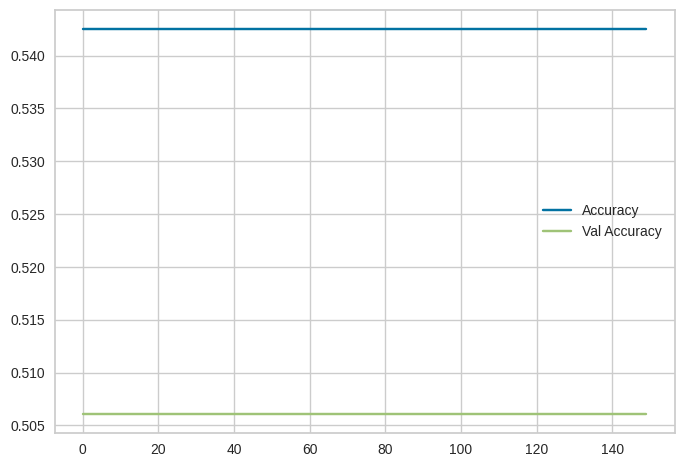

In [95]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()


In [1]:
# AUTO ML İLE Gradient Boosting Classifier MODELİNDE EN YÜKSEK TAHMİN GERÇEKLEŞTİ. DEEP LEARNİNG İLE DE DENEDİK AMA SONUÇ DÜŞÜK ÇIKTI